In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [355]:
customers=pd.read_csv(r'C:\Users\HP\Downloads\Customers.txt')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [356]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [357]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [358]:
customers.duplicated().sum()

0

In [359]:
#drop email,adress, avatar columns because they will not help us to find the solution
customers.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


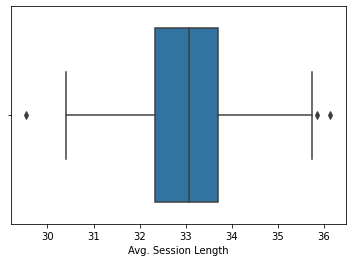

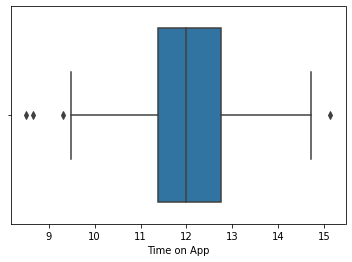

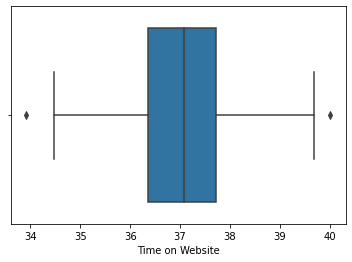

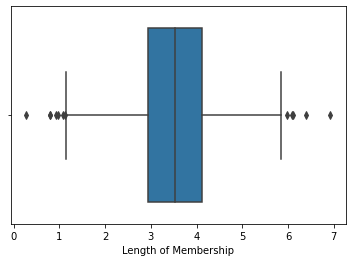

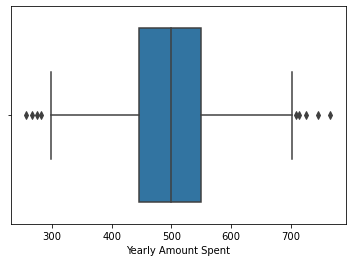

In [360]:
#outlier detection

for column in customers:
        plt.figure()
        sns.boxplot(data=numeric_custom, x=column)

In [361]:
#outlier treatment
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR = Q3 - Q1


In [362]:
lower=Q1 - 1.5 * IQR
higher=Q3 + 1.5 * IQR

In [363]:
customers = customers[~((customers < (lower)) |(customers > (higher))).any(axis=1)]
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [364]:
#lets identify the correlations between features

(5.5, -0.5)

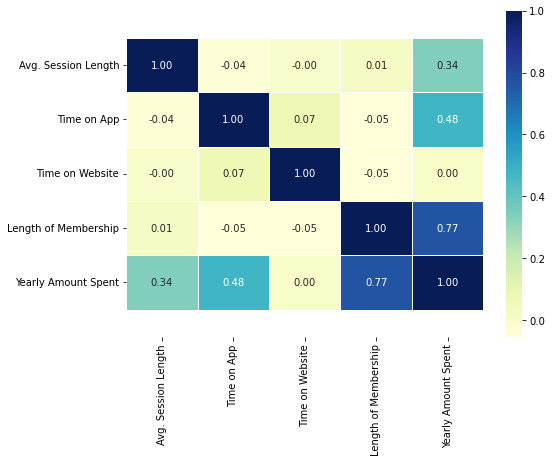

In [365]:
corr_matrix = customers.corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [366]:
# We can see that there is strong positive correlation (0.77) between 'Yearly Amount Spent' and 'Length of Membership'
#lets visualize specially

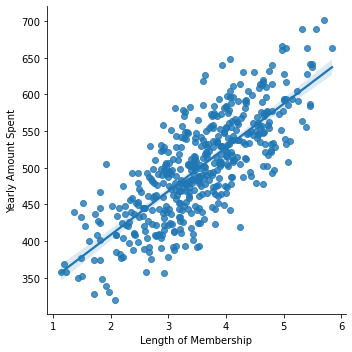

In [367]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers);


In [368]:
# correlation between  time on web or app  and yearly amount  

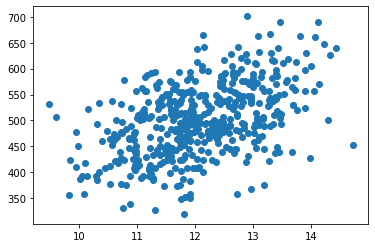

In [369]:
plt.scatter(x='Time on App',y='Yearly Amount Spent',data =customers)
plt.show()

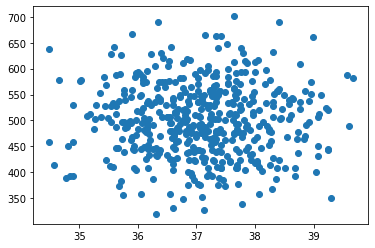

In [370]:
plt.scatter(x='Time on Website',y='Yearly Amount Spent',data =customers)
plt.show()

In [371]:
# while there is no coorelation between time on website and yearly amount spent,correlation is better for app

In [372]:
X = customers[customers.columns[:-1]]
y=customers['Yearly Amount Spent']

In [373]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [374]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [375]:
lr.coef_

array([25.84599961, 38.98125002,  0.3860776 , 60.93718997])

In [376]:
predicted=lr.predict(X_test)

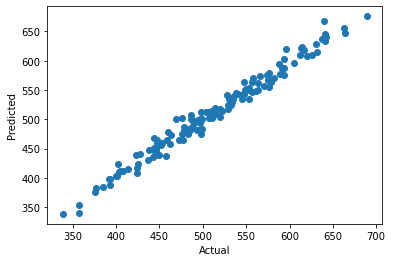

In [377]:
plt.scatter(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [378]:
metrics.r2_score(y_test,predicted)

0.9797780288402844

In [379]:
metrics.mean_squared_error(y_test,predicted)

108.94865138715392

In [380]:
coef = pd.DataFrame(lr.coef_,X.columns,columns= ['Coeff'])
coef

,Coeff
Avg. Session Length,25.846000
Time on App,38.981250
Time on Website,0.386078
Length of Membership,60.937190


In [381]:
#According to coefficinet and correlation  results,we can say customers spent time on app orders more (based on yearly amount) 
#than website.Length of Membership has big impact on decision making as well. Company should focus more effort on attracting 
#customers'attention for spending time  on website if it wants website using to catch up app using. 
#But company may have another approach and make more effort for app improvement because it is already certain 
#that customers like to spend time more on mobile app . 